Read the normalized df.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

train_data = pd.read_csv("UsedCarSellingInfoCraigslistNormalized.csv")
train_data.head()

,Unnamed: 0,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,weather,city,state,county,VClass,youSaveSpend,usage_yr
0,0,11900,2010,dodge,challenger se,6,gas,43600,clean,automatic,rwd,full-size,coupe,38.0,Harrisburg,South Dakota,Lincoln County,midsize cars,-5750.0,9
1,1,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15
2,2,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15
3,3,400,2001,pontiac,2001 grand prix,0,gas,217000,clean,automatic,fwd,full-size,sedan,47.0,Algona,Iowa,Kossuth County,midsize cars,-1750.0,18
4,4,9900,2007,gmc,yukon,8,gas,169000,clean,automatic,4wd,full-size,suv,38.0,Lennox,South Dakota,Lincoln County,standard pickup trucks 4wd,-5000.0,12


In [2]:
train_data.tail()

,Unnamed: 0,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,weather,city,state,county,VClass,youSaveSpend,usage_yr
546023,546525,25786,2014,chevrolet,silverado 1500,8,gas,55286,clean,automatic,4wd,full-size,pickup,52.0,Harrisonville,Missouri,Cass County,standard pickup trucks 4wd,-5000.0,5
546024,546526,28991,2015,ford,f150 supercrew cab,6,gas,105123,clean,automatic,4wd,full-size,pickup,52.0,Harrisonville,Missouri,Cass County,compact cars,-1750.0,4
546025,546527,25995,2015,ford,f150 supercrew cab,8,other,108142,clean,automatic,4wd,full-size,pickup,52.0,Harrisonville,Missouri,Cass County,compact cars,-1750.0,4
546026,546528,40000,2006,ford,sterling,0,diesel,350000,clean,manual,fwd,full-size,truck,52.0,Bel-Nor,Missouri,Saint Louis County,midsize cars,-1500.0,13
546027,546529,6995,2007,ram,1500,0,gas,197936,clean,manual,4wd,full-size,truck,52.0,Moscow Mills,Missouri,Lincoln County,standard pickup trucks 4wd,-5000.0,12


Let's drop 'Unnamed: 0'.

In [3]:
train_data.drop(['Unnamed: 0'], axis = 1, inplace=True)
train_data.columns

Index(['price', 'year', 'manufacturer', 'make', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'weather', 'city', 'state', 'county', 'VClass', 'youSaveSpend',
       'usage_yr'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546028 entries, 0 to 546027
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         546028 non-null  int64  
 1   year          546028 non-null  int64  
 2   manufacturer  546028 non-null  object 
 3   make          546027 non-null  object 
 4   cylinders     546028 non-null  int64  
 5   fuel          546028 non-null  object 
 6   odometer      546028 non-null  int64  
 7   title_status  546028 non-null  object 
 8   transmission  546028 non-null  object 
 9   drive         546028 non-null  object 
 10  size          546028 non-null  object 
 11  type          546028 non-null  object 
 12  weather       546028 non-null  float64
 13  city          546028 non-null  object 
 14  state         545990 non-null  object 
 15  county        522298 non-null  object 
 16  VClass        546028 non-null  object 
 17  youSaveSpend  546028 non-null  float64
 18  usag

Let's add Region and Division by 'state'.

In [5]:
region_df= pd.read_csv("datasets_31195_39789_states.csv")
region_df.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


Let's change the column as lowercase.

In [6]:
region_df = region_df.rename(columns = {"State":"state", "State Code":"state_code",
                                        "Region":"region","Division":"division"}) 

Let's do a left-join by 'state'.

In [7]:
train_data = train_data.merge(region_df, how='left', on=['state'])
train_data.head()

,price,year,manufacturer,make,cylinders,fuel,odometer,title_status,transmission,drive,size,type,weather,city,state,county,VClass,youSaveSpend,usage_yr,state_code,region,division
0,11900,2010,dodge,challenger se,6,gas,43600,clean,automatic,rwd,full-size,coupe,38.0,Harrisburg,South Dakota,Lincoln County,midsize cars,-5750.0,9,SD,Midwest,West North Central
1,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15,IA,Midwest,West North Central
2,2800,2004,ford,taurus,6,gas,168591,clean,automatic,fwd,full-size,sedan,47.0,Sanborn,Iowa,O'Brien County,large cars,-2250.0,15,IA,Midwest,West North Central
3,400,2001,pontiac,2001 grand prix,0,gas,217000,clean,automatic,fwd,full-size,sedan,47.0,Algona,Iowa,Kossuth County,midsize cars,-1750.0,18,IA,Midwest,West North Central
4,9900,2007,gmc,yukon,8,gas,169000,clean,automatic,4wd,full-size,suv,38.0,Lennox,South Dakota,Lincoln County,standard pickup trucks 4wd,-5000.0,12,SD,Midwest,West North Central


Let's check 'state' which null values in 'region' or 'division'.

In [8]:
train_data['state'][train_data['region'].isnull()].value_counts()

British Columbia                    23506
Ontario                              2466
Alberta                               354
Baja California                       132
Manitoba                               88
Washington, D.C.                       78
Saskatchewan                           33
Nova Scotia                            32
Tristan da Cunha                       31
Guerrero                               31
Galapagos                              24
Nunavut                                22
Oaxaca                                 17
Jalisco                                16
Yukon                                  14
Yucatan                                13
Quebec                                 13
Saint Helena                           10
New Brunswick                           9
Newfoundland and Labrador               9
Valparaiso                              9
Sonora                                  9
Tamaulipas                              7
Eastern Cape                      

Let's fill in 'Washington, D.C.''s 'state_code' as 'DC', 'region' as 'South', and 'division' as 'South Atlantic'.

In [9]:
region_df[region_df['state_code']=='DC']

,state,state_code,region,division
7,District of Columbia,DC,South,South Atlantic


In [10]:
# US
train_data.loc[train_data['state'] == 'Washington, D.C.','state_code']='DC'   
train_data.loc[train_data['state'] == 'Washington, D.C.','region']='South'   
train_data.loc[train_data['state'] == 'Washington, D.C.','division']='South Atlantic'   

In [11]:
((train_data.isnull().sum()/len(train_data)).sort_values(ascending = False)*100).astype(float)

division        4.950296
state_code      4.950296
region          4.950296
county          4.345931
state           0.006959
make            0.000183
transmission    0.000000
year            0.000000
manufacturer    0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
size            0.000000
drive           0.000000
type            0.000000
weather         0.000000
city            0.000000
VClass          0.000000
youSaveSpend    0.000000
usage_yr        0.000000
price           0.000000
dtype: float64

Let's drop rows with null values.  I will concentrate of the US information only.

In [12]:
train_data.drop(train_data[train_data['region'].isnull()].index, inplace=True)
train_data.drop(train_data[train_data['make'].isnull()].index, inplace=True)
((train_data.isnull().sum()/len(train_data)).sort_values(ascending = False)*100).astype(float)

county          0.020809
division        0.000000
drive           0.000000
year            0.000000
manufacturer    0.000000
make            0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
size            0.000000
region          0.000000
type            0.000000
weather         0.000000
city            0.000000
state           0.000000
VClass          0.000000
youSaveSpend    0.000000
usage_yr        0.000000
state_code      0.000000
price           0.000000
dtype: float64

In [13]:
train_data['state'][train_data['county'].isnull()].value_counts()

Washington, D.C.    78
New York            30
Name: state, dtype: int64

In [14]:
train_data['county'][train_data['state_code']=='DC'].value_counts()

Series([], Name: county, dtype: int64)

In [15]:
train_data['city'][(train_data['county'].notnull())
                   & (train_data['state']=='New York')].value_counts()

Bridgeport          285
Rome                220
Bensonhurst         148
Utica               134
Binghamton          125
                   ... 
Glenwood Landing      1
Armonk                1
Harrison              1
West Point            1
Pleasantville         1
Name: city, Length: 711, dtype: int64

In [16]:
train_data['county'][train_data['city']=='New York City'].value_counts()

Series([], Name: county, dtype: int64)

Let's drop 'county' in that 'city' and 'state' are enough location information.

In [17]:
train_data.drop(['county'], axis = 1, inplace=True)

In [18]:
train_data['type'].value_counts()

sedan          167737
suv            120526
truck           68052
pickup          47120
coupe           35616
hatchback       19525
mini-van        14141
convertible     12781
wagon           12323
van              9999
other            8894
offroad          1721
bus               562
Name: type, dtype: int64

In [19]:
train_data['VClass'].value_counts()

sport utility vehicle - 4wd           91891
standard pickup trucks 4wd            90629
midsize cars                          89452
compact cars                          57707
standard pickup trucks                53722
large cars                            35100
subcompact cars                       25825
minivan - 2wd                         17328
standard pickup trucks 2wd            14885
small sport utility vehicle 4wd       11014
two seaters                            7109
small sport utility vehicle 2wd        6778
small station wagons                   4779
sport utility vehicle - 2wd            4534
minicompact cars                       2584
minivan - 4wd                          2384
small pickup trucks 4wd                1373
special purpose vehicle 2wd             886
midsize station wagons                  294
standard sport utility vehicle 4wd      293
special purpose vehicles                200
vans                                    101
midsize-large station wagons    

Let's drop 'type', and instead 'VClass' can give more specific information of vehicles.

In [20]:
train_data.drop(['type'], axis = 1, inplace=True)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518997 entries, 0 to 546027
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         518997 non-null  int64  
 1   year          518997 non-null  int64  
 2   manufacturer  518997 non-null  object 
 3   make          518997 non-null  object 
 4   cylinders     518997 non-null  int64  
 5   fuel          518997 non-null  object 
 6   odometer      518997 non-null  int64  
 7   title_status  518997 non-null  object 
 8   transmission  518997 non-null  object 
 9   drive         518997 non-null  object 
 10  size          518997 non-null  object 
 11  weather       518997 non-null  float64
 12  city          518997 non-null  object 
 13  state         518997 non-null  object 
 14  VClass        518997 non-null  object 
 15  youSaveSpend  518997 non-null  float64
 16  usage_yr      518997 non-null  int64  
 17  state_code    518997 non-null  object 
 18  regi

In [22]:
train_data['weather'] = train_data['weather'].astype(int)
train_data['youSaveSpend'] = train_data['youSaveSpend'].astype(int)

In [23]:
train_data['VClass'].value_counts()

sport utility vehicle - 4wd           91891
standard pickup trucks 4wd            90629
midsize cars                          89452
compact cars                          57707
standard pickup trucks                53722
large cars                            35100
subcompact cars                       25825
minivan - 2wd                         17328
standard pickup trucks 2wd            14885
small sport utility vehicle 4wd       11014
two seaters                            7109
small sport utility vehicle 2wd        6778
small station wagons                   4779
sport utility vehicle - 2wd            4534
minicompact cars                       2584
minivan - 4wd                          2384
small pickup trucks 4wd                1373
special purpose vehicle 2wd             886
midsize station wagons                  294
standard sport utility vehicle 4wd      293
special purpose vehicles                200
vans                                    101
midsize-large station wagons    

In [24]:
train_data['size'].value_counts()

full-size      268301
mid-size       168567
compact         77399
sub-compact      4730
Name: size, dtype: int64

Let's drop 'size' because 'VClass' replace it.

In [25]:
train_data.drop(['size'], axis = 1, inplace=True)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518997 entries, 0 to 546027
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         518997 non-null  int64 
 1   year          518997 non-null  int64 
 2   manufacturer  518997 non-null  object
 3   make          518997 non-null  object
 4   cylinders     518997 non-null  int64 
 5   fuel          518997 non-null  object
 6   odometer      518997 non-null  int64 
 7   title_status  518997 non-null  object
 8   transmission  518997 non-null  object
 9   drive         518997 non-null  object
 10  weather       518997 non-null  int32 
 11  city          518997 non-null  object
 12  state         518997 non-null  object
 13  VClass        518997 non-null  object
 14  youSaveSpend  518997 non-null  int32 
 15  usage_yr      518997 non-null  int64 
 16  state_code    518997 non-null  object
 17  region        518997 non-null  object
 18  division      518997 non

Let's drop some features in order to make the dataset lighter.

In [27]:
#train_data.drop(['division'], axis = 1, inplace=True)
train_data.drop(['state_code'], axis = 1, inplace=True)
train_data.drop(['state'], axis = 1, inplace=True)
train_data.drop(['city'], axis = 1, inplace=True)
#train_data.drop(['manufacturer'], axis = 1, inplace=True)
train_data.drop(['make'], axis = 1, inplace=True)

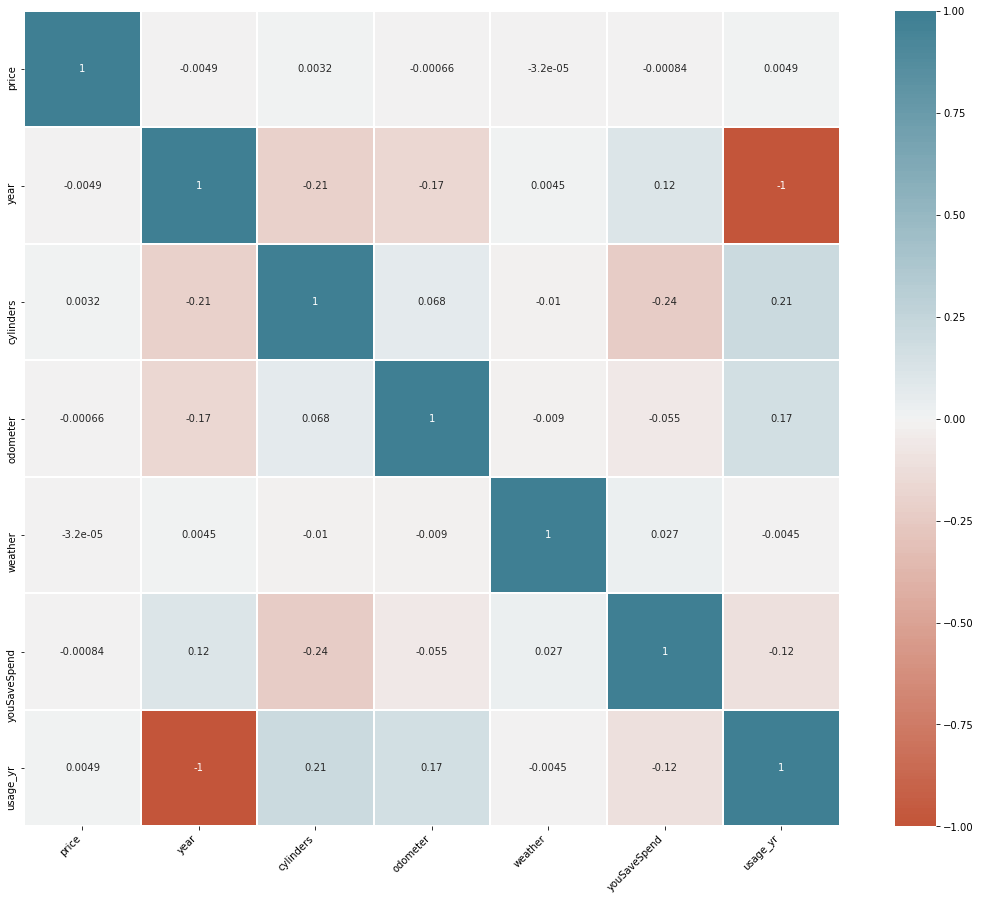

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_data.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=1
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Target, 'price' seems having timid correlation with other features.  So let's remove outliers of 'price'.

Let's make another feature 'price_log'.

In [29]:
import math

train_data['price_log'] = np.log(train_data['price'])

In [30]:
train_data.head()

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,drive,weather,VClass,youSaveSpend,usage_yr,region,division,price_log
0,11900,2010,dodge,6,gas,43600,clean,automatic,rwd,38,midsize cars,-5750,9,Midwest,West North Central,9.384294
1,2800,2004,ford,6,gas,168591,clean,automatic,fwd,47,large cars,-2250,15,Midwest,West North Central,7.937375
2,2800,2004,ford,6,gas,168591,clean,automatic,fwd,47,large cars,-2250,15,Midwest,West North Central,7.937375
3,400,2001,pontiac,0,gas,217000,clean,automatic,fwd,47,midsize cars,-1750,18,Midwest,West North Central,5.991465
4,9900,2007,gmc,8,gas,169000,clean,automatic,4wd,38,standard pickup trucks 4wd,-5000,12,Midwest,West North Central,9.200290


<AxesSubplot:>

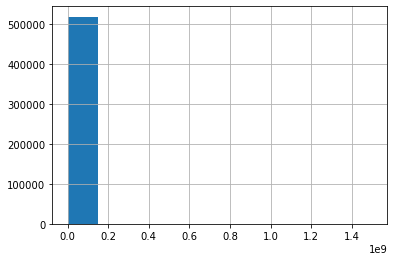

In [31]:
train_data['price'].hist()

<AxesSubplot:>

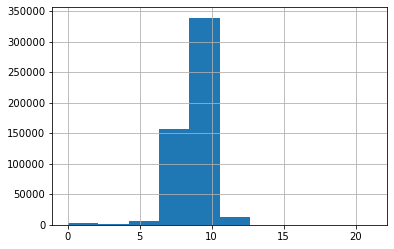

In [32]:
train_data['price_log'].hist()

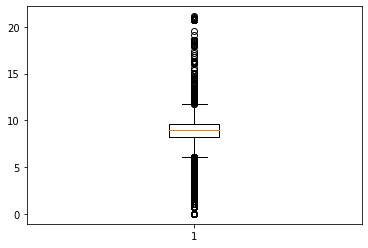

In [33]:
plt.boxplot(train_data['price_log'])
plt.show()

The above 'price_log' seems having too many outliers, so it is better to remove outliers.

# Remove Outliers by using IsolationForest.

In [34]:
train_data = pd.get_dummies(train_data, columns=['fuel','title_status','transmission','drive',
                                                 'VClass','region','division','manufacturer'])
#feature_columns = list(train_data.columns.difference(['price']))


In [35]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.004), 
                    max_features=1.0, bootstrap=False, n_jobs=-1,
                    random_state=None, verbose=0,behaviour="new")
# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf.fit(train_data)
pred = clf.predict(train_data)
train_data['anomaly']=pred
outliers=train_data.loc[train_data['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(train_data['anomaly'].value_counts())

C:\Users\danie\Anaconda\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


 1    516921
-1      2076
Name: anomaly, dtype: int64


In [36]:
print(train_data['price'][train_data['anomaly']==-1].value_counts()/len(train_data['price'][train_data['anomaly']==-1].value_counts()))

12000     0.059130
5000      0.057391
1         0.053913
2500      0.052174
12500     0.048696
            ...   
119900    0.001739
12495     0.001739
45959     0.001739
76000     0.001739
2         0.001739
Name: price, Length: 575, dtype: float64


In [37]:
print(train_data['price'][train_data['anomaly']==1].value_counts()/len(train_data['price'][train_data['anomaly']==1].value_counts()))

2500     0.439654
3500     0.425599
4500     0.365028
1500     0.336718
3000     0.331166
           ...   
28551    0.000050
32645    0.000050
52883    0.000050
7817     0.000050
32368    0.000050
Name: price, Length: 19993, dtype: float64


Let's drop rows whose 'anomaly' value is -1.

In [38]:
train_data.drop(train_data[train_data['anomaly']==-1].index, inplace=True)

In [39]:
print(train_data['price'][train_data['anomaly']==-1].value_counts()/len(train_data['price'][train_data['anomaly']==-1].value_counts()))

Series([], Name: price, dtype: float64)


Let's drop 'anomaly'.

In [40]:
train_data.drop(['anomaly'], axis = 1, inplace=True)

Let's makes features as X and target as y.

In [41]:
X = train_data.drop('price', axis=1)
y = train_data['price'].values

In [42]:
train_data = train_data.astype('int')

In [61]:
train_data.head()

,price,year,cylinders,odometer,weather,youSaveSpend,usage_yr,price_log,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,VClass_compact cars,VClass_large cars,VClass_midsize cars,VClass_midsize station wagons,VClass_midsize-large station wagons,VClass_minicompact cars,VClass_minivan - 2wd,VClass_minivan - 4wd,VClass_small pickup trucks,VClass_small pickup trucks 2wd,VClass_small pickup trucks 4wd,VClass_small sport utility vehicle 2wd,VClass_small sport utility vehicle 4wd,VClass_small station wagons,VClass_special purpose vehicle 2wd,VClass_special purpose vehicle 4wd,VClass_special purpose vehicles,VClass_sport utility vehicle - 2wd,VClass_sport utility vehicle - 4wd,VClass_standard pickup trucks,VClass_standard pickup trucks 2wd,VClass_standard pickup trucks 4wd,VClass_standard sport utility vehicle 2wd,VClass_standard sport utility vehicle 4wd,VClass_subcompact cars,VClass_two seaters,VClass_vans,"VClass_vans, passenger type",region_Midwest,region_Northeast,region_South,region_West,division_East North Central,division_East South Central,division_Middle Atlantic,division_Mountain,division_New England,division_Pacific,division_South Atlantic,division_West North Central,division_West South Central,manufacturer_acura,manufacturer_alfa romeo,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chev,manufacturer_chevrolet,manufacturer_chevy,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_hennessey,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_morgan,manufacturer_nissan,manufacturer_pontiac,manufacturer_porche,manufacturer_ram,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
0,11900,2010,6,43600,38,-5750,9,9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2800,2004,6,168591,47,-2250,15,7,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2800,2004,6,168591,47,-2250,15,7,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,400,2001,0,217000,47,-1750,18,5,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9900,2007,8,169000,38,-5000,12,9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split train test data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Decision Tree Regressor with Randomized Search CV

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [46]:
rt = tree.DecisionTreeRegressor()

In [47]:
rt = rt.fit(X_train, y_train)
rt

DecisionTreeRegressor()

# CART Regression Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.99569
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, S

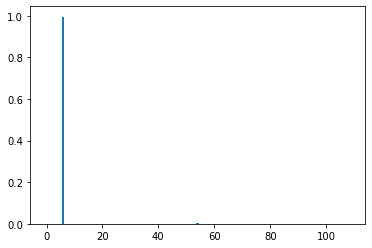

In [51]:
%time
from matplotlib import pyplot# get importance
importance = rt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show();

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Trial 1-1 : Max Depth = 2, CV = 2, n_iter=1

In [49]:
%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
         'max_depth' : [2]}

random_search_cv1 = RandomizedSearchCV(rt, params, n_jobs=-1, verbose=1, cv=2, n_iter=1)
random_search_cv1.fit(X_train, y_train)

Wall time: 0 ns
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.7s finished


RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [2]},
                   verbose=1)

In [50]:
print("R-Squared::{}".format(random_search_cv1.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv1.best_params_))

R-Squared::0.9789604060393803
Best Hyperparameters::
{'max_depth': 2, 'criterion': 'friedman_mse'}


# Trial 1-2 : Max Depth = 2, CV = 2, n_iter=2

In [57]:
%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
         'max_depth' : [2]}

random_search_cv1 = RandomizedSearchCV(rt, params, n_jobs=-1, verbose=1, cv=2, n_iter=2)
random_search_cv1.fit(X_train, y_train)

Wall time: 0 ns
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 61.5min finished


RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [2]},
                   verbose=1)

In [58]:
print("R-Squared::{}".format(random_search_cv1.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv1.best_params_))

R-Squared::0.9694098793173231
Best Hyperparameters::
{'max_depth': 2, 'criterion': 'mse'}


# Trial 1-3 : Max Depth = 2, CV = 3, n_iter=2

In [ ]:
%time
params = {'criterion' :['mse', 'friedman_mse', 'mae'],
         'max_depth' : [2]}

random_search_cv1 = RandomizedSearchCV(rt, params, n_jobs=-1, verbose=1, cv=3, n_iter=2)
random_search_cv1.fit(X_train, y_train)

In [ ]:
print("R-Squared::{}".format(random_search_cv1.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv1.best_params_))

# Tree Visualization of Decision Tree Regression

In [ ]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(rt, X_train, y_train,
               target_name="price",
               feature_names=train_data.feature_names)
viz

# Random Forest Regressor with Randomized Search CV

Creating a Random Forest Regression model and fitting it to the training data

In [53]:
%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf

Wall time: 0 ns


RandomForestRegressor()

# CART Regression Feature Importance

Feature: 0, Score: 0.00061
Feature: 1, Score: 0.00005
Feature: 2, Score: 0.00300
Feature: 3, Score: 0.00027
Feature: 4, Score: 0.00023
Feature: 5, Score: 0.00100
Feature: 6, Score: 0.99067
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00002
Feature: 22, Score: 0.00009
Feature: 23, Score: 0.00007
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

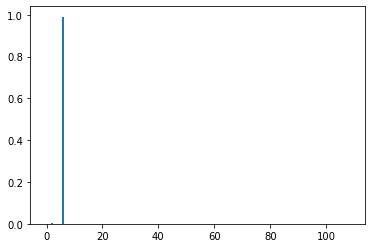

In [56]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show();

# Trial 2-1 : n_estimators = 1, Max Depth = 2, CV = 2, n_iter=1

In [54]:
%time
from sklearn.model_selection import RandomizedSearchCV
params_ = {'criterion' :['mse', 'mae'],
           'n_estimators' : [1],
           'max_depth' : [2]}

random_search_cv2 = RandomizedSearchCV(rf, params_, n_jobs=-1, verbose=1, cv=2, n_iter=1)
random_search_cv2.fit(X_train, y_train)

Wall time: 0 ns
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 24.8min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2], 'n_estimators': [1]},
                   verbose=1)

In [55]:
print("R-Squared::{}".format(random_search_cv2.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv2.best_params_))

R-Squared::0.9271594638731393
Best Hyperparameters::
{'n_estimators': 1, 'max_depth': 2, 'criterion': 'mae'}


# Trial 2-2 : n_estimators = 1, Max Depth = 2, CV = 2, n_iter=2

In [59]:
%time
from sklearn.model_selection import RandomizedSearchCV
params_ = {'criterion' :['mse', 'mae'],
           'n_estimators' : [1],
           'max_depth' : [2]}

random_search_cv2 = RandomizedSearchCV(rf, params_, n_jobs=-1, verbose=1, cv=2, n_iter=2)
random_search_cv2.fit(X_train, y_train)

Wall time: 0 ns
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 24.6min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=2, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2], 'n_estimators': [1]},
                   verbose=1)

In [60]:
print("R-Squared::{}".format(random_search_cv2.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv2.best_params_))

R-Squared::0.9725962203106309
Best Hyperparameters::
{'n_estimators': 1, 'max_depth': 2, 'criterion': 'mae'}


# Trial 2-3 : n_estimators = 2, Max Depth = 2, CV = 2, n_iter=2

In [ ]:
%time
from sklearn.model_selection import RandomizedSearchCV
params_ = {'criterion' :['mse', 'mae'],
           'n_estimators' : [2],
           'max_depth' : [2]}

random_search_cv2 = RandomizedSearchCV(rf, params_, n_jobs=-1, verbose=1, cv=2, n_iter=2)
random_search_cv2.fit(X_train, y_train)

Wall time: 0 ns
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 52.2min finished


In [ ]:
print("R-Squared::{}".format(random_search_cv2.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv2.best_params_))

# Trial 2-4 : n_estimators = 1, Max Depth = 2, CV = 3, n_iter=2

In [ ]:
%time
from sklearn.model_selection import RandomizedSearchCV
params_ = {'criterion' :['mse', 'mae'],
           'n_estimators' : [1],
           'max_depth' : [2]}

random_search_cv2 = RandomizedSearchCV(rf, params_, n_jobs=-1, verbose=1, cv=3, n_iter=2)
random_search_cv2.fit(X_train, y_train)

In [ ]:
print("R-Squared::{}".format(random_search_cv2.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv2.best_params_))

# Tree Visualization of Random Forest Regression

In [ ]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(rf, X_train, y_train,
               target_name="price",
               feature_names=train_data.feature_names)
viz

sns.pairplot(train_data, hue='fuel');

sns.pairplot(train_data, hue='title_status');

sns.pairplot(train_data, hue='transmission');

sns.pairplot(train_data, hue='drive');